In [51]:
import numpy as np

def loss(k, b):
    b0, b1, b2 = b
    return (b0 * k/100 + 0.1 * b1 + 0.5) **(-1) + b2 * 0.01

def accuracy(k, b):
    return (2 - loss(k, b)) / 2

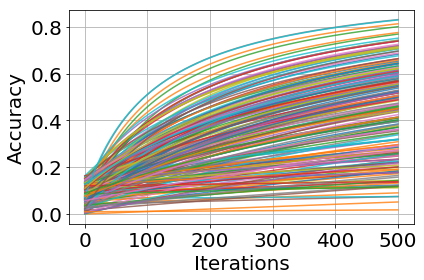

In [54]:
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use(["seaborn-white"])
# import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams.update({'font.size': 80})
%matplotlib inline
distribution = []
for i in range(200):
    b0 = np.random.exponential(0.1)
    b1, b2 = np.random.rand(2)
    b = [b0, b1, b2]
    accs = [accuracy(k, b) for k in range(501)]
    plt.plot(accs, label=b[0], alpha=0.8)
    distribution += [accs[-1]]
plt.grid(True)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.tight_layout()

plt.savefig("optimus-accuracy.pdf")

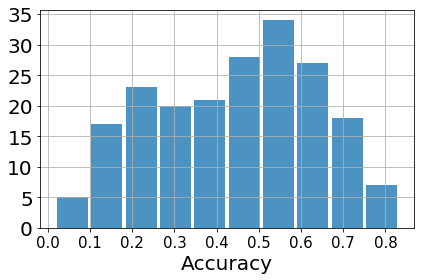

In [55]:
plt.hist(distribution, bins=10, rwidth=0.9, alpha=0.8)
plt.grid(True)
plt.xticks( fontsize=15)
plt.yticks( fontsize=20)
# plt.xlabel("Iterations", fontsize=20)
plt.xlabel("Accuracy", fontsize=20)
plt.tight_layout()

plt.savefig("optimus-accuracy-distribution.pdf")

In [61]:
b = [0.13, 0.72, 0.18]

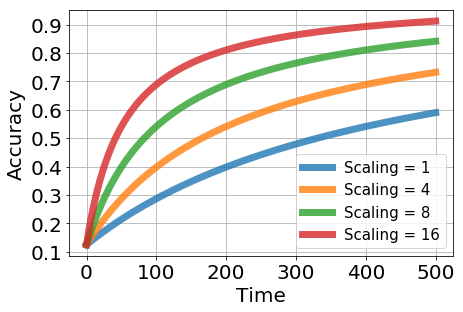

In [75]:
acc_t1 = [accuracy(k, b) for k in range(501)]
acc_t2 = [accuracy(k, b) for k in range(0, 501*2, 2)]
acc_t4 = [accuracy(k, b) for k in range(0, 501*4, 4)]
acc_t8 = [accuracy(k, b) for k in range(0, 501*8, 8)]

plt.plot(acc_t1, label="Scaling = 1", alpha=0.8, linewidth=7.0)
plt.plot(acc_t2, label="Scaling = 4", alpha=0.8, linewidth=7.0)
plt.plot(acc_t4, label="Scaling = 8", alpha=0.8,linewidth=7.0)
plt.plot(acc_t8, label="Scaling = 16", alpha=0.8, linewidth=7.0)
plt.grid(True)
leg = plt.legend(fontsize=15)
plt.tight_layout()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.xlabel("Time", fontsize=20)

plt.savefig("scaling-basic.pdf", bbox_inches='tight')

In [173]:
b_list = []
for i in range(10):
    b0 = np.random.exponential(0.1)
    b1, b2 = np.random.rand(2)
    b_list += [[b0, b1, b2]]

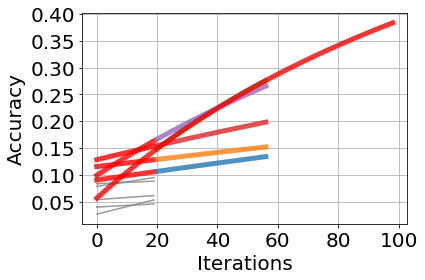

In [186]:
distribution = []
for b in sorted(b_list, key=lambda b: accuracy(20, b))[:-5]:
    accs = [accuracy(k, b) for k in range(20)]
    plt.plot(accs, 'gray', label=b[0], alpha=0.8)
    
for b in sorted(b_list, key=lambda b: accuracy(20, b))[-5:]:
    accs = [accuracy(k, b) for k in range(20)]
    plt.plot(accs, 'r', label=b[0], alpha=0.8, linewidth=5)
    
for b in sorted(b_list, key=lambda b: accuracy(20, b))[-5:]:
    idx = list(range(20, 60, 4))
    accs = [accuracy(k, b) for k in idx]
    plt.plot(idx, accs, '-', label=b[0], alpha=0.8, linewidth=5)
lastidx = range(20, 100, 2)
plt.plot(lastidx, [accuracy(k, max(b_list, key=lambda b: accuracy(100, b))) for k in lastidx], 'r',label=b[0], alpha=0.8, linewidth=5)
    
plt.grid(True)
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel("Iterations", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.tight_layout()
plt.savefig("fidelity-experiment.pdf",  bbox_inches='tight')

In [86]:
np.max(distribution)

0.3853289420793439